In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats


In [61]:
df_cars = pd.read_csv('./used_cars_data.csv')

df_cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [62]:
df_cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [63]:
df_cars = df_cars.drop('S.No.', axis=1)
df_cars = df_cars.drop('New_Price', axis=1)

df_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [64]:
df_cars['Car_Age'] = datetime.now().year - df_cars['Year']

df_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [65]:
df_cars['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [66]:
df_electric = df_cars[df_cars['Fuel_Type'] == 'Electric']

df_electric

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


Reference [URL](https://www.greencars.com/greencars-101/battery-degradation-and-how-to-prevent-it#:~:text=Battery%20degradation%20doesn't%20happen,usable%20life%20of%20a%20vehicle.) for battery degradation:

* Approximately 95 percent of the battery retains its battery function during the first 50,000 miles

Since both the electric cars have the similar Kilometers_Driven, we can assume that the battery degradation is similar for both the cars.

[Mahindra E Verito D4](https://www.carwale.com/mahindra-cars/verito/e-d4-2016-2019/) specs

* The battery degradation is 5% for the first 50,000 miles. As 50,000 km = 31,068.6 miles, We can assume that the battery degradation is 3% for the first 31,068 miles.
* Full battery capacity range for Mahindra E Verito D4 is 140km on full charge.
* Mahindra E Verito D4 has a battery capacity of 18.55kWh.
* 3% of 18.55kWh = 0.5565kWh. So, the battery capacity after 31,068 miles is 18.55 - 0.5565 = 17.9935kWh ~18kWh.
* 18.55 / 140 = 0.1325kWh/km. So, the car can travel 18 / 0.1325 = 135.85km on 18kWh.
* On 18kWh, the car can travel 135.85km. So, the car can travel 7.547km on 1kWh.
* 1 liter of petrol is equivalent to 8.9kWh. [Reference](https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/buying-electric-vehicle/understanding-the-tables/21383)
* 18kWh is equivalent to, 18 / 8.9 = 2.02 liters of petrol.
* So, the car can travel 135.85km on 2.02 liters of petrol.
* The mileage of Mahindra E Verito D4 is 67.2 kmpl.



Mileage of [Toyota Prius 2009-2016 Z4](https://www.cardekho.com/toyota/prius-2009-2016) is 23.91 kmpl.

In [67]:
df_cars.loc[df_cars['Name'] == 'Mahindra E Verito D4', 'Mileage'] = "67.2 kmpl"

df_cars.loc[df_cars['Name'] == 'Mahindra E Verito D4']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,67.2 kmpl,72 CC,41 bhp,5.0,13.0,8


In [68]:
df_cars.loc[df_cars['Name'] == 'Toyota Prius 2009-2016 Z4', 'Mileage'] = "23.91 kmpl"

df_cars.loc[df_cars['Name'] == "Toyota Prius 2009-2016 Z4"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,23.91 kmpl,1798 CC,73 bhp,5.0,12.75,13


In [69]:
df_cars.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Car_Age                int64
dtype: object

In [70]:
print("Engine null values", df_cars['Engine'].isnull().sum())
print("Power null values", df_cars['Power'].isnull().sum())
print("Mileage null values", df_cars['Mileage'].isnull().sum())

Engine null values 46
Power null values 46
Mileage null values 0


In [71]:
df_cars['Engine'] = df_cars['Engine'].fillna(0)

df_cars['Engine'] = df_cars['Engine'].str.split(' ').str.get(0).astype(float)

df_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.8 bhp,5.0,17.74,11


In [72]:
df_cars['Power'] = df_cars['Power'].str.split(' ').str.get(0)
df_cars['Power'] = df_cars['Power'].replace(['null', 'null ', '', 'N/A'], np.nan)
df_cars['Power'] = df_cars['Power'].fillna(0)
df_cars['Power'] = df_cars['Power'].astype(float)
df_cars.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,11


In [73]:
df_cars['Mileage'].str.split(' ').str.get(1).unique()

array(['km/kg', 'kmpl'], dtype=object)

In [74]:
# Count how many rows has Mileage unit in km/kg and kmpl
print("Mileage km/kg", df_cars['Mileage'].str.split(' ').str.get(1).str.contains('km/kg').sum())

Mileage km/kg 74


In [75]:
df_cars['Mileage_Unit'] = df_cars['Mileage'].str.split(' ').str[1]

unit_counts = df_cars['Mileage_Unit'].value_counts()

print(unit_counts)


Mileage_Unit
kmpl     7179
km/kg      74
Name: count, dtype: int64


In [76]:
df_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,14,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,9,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,13,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,12,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,11,kmpl


[Reference](https://ipshita.medium.com/run-through-of-eda-and-feature-engineering-8511d3a6f863) to the conversion formula to convert km/kg to kmpl, which is km/mg * 1.4 = kmpl.

In [77]:
# convert km/kg unit to kmpl unit
df_cars.loc[df_cars['Mileage_Unit'] == 'km/kg', 'Mileage'] = df_cars['Mileage'].str.split(' ').str.get(0).astype(float) * 1.4


df_cars['Mileage'] = df_cars['Mileage'].astype(str)

# Add 'km/kg' to Mileage where Mileage_Unit is 'km/kg'
df_cars.loc[df_cars['Mileage_Unit'] == 'km/kg', 'Mileage'] = df_cars['Mileage'] + ' kmpl'


df_cars.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24 kmpl,998.0,58.16,5.0,1.75,14,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,9,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,13,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,12,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,11,kmpl


In [78]:
df_cars.loc['Mileage'] = df_cars['Mileage'].str.split(' ').str.get(0).astype(float)

df_cars['Mileage'] = df_cars['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '')


df_cars['Mileage'] = df_cars['Mileage'].astype(float)

In [79]:
df_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14.0,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9.0,kmpl
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13.0,kmpl
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12.0,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11.0,kmpl


In [80]:
df_cars.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7254 entries, 0 to Mileage
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   float64
 3   Kilometers_Driven  7253 non-null   float64
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   float64
 13  Mileage_Unit       7253 non-null   object 
dtypes: float64(8), object(6)
memory usage: 850.1+ KB


Car_Age:
Normal distribution: No
Number of outliers: 58
Lower bound: 0.50
Upper bound: 20.50
-------------------------
Kilometers_Driven:
Normal distribution: No
Number of outliers: 258
Lower bound: -24500.00
Upper bound: 131500.00
-------------------------
Mileage:
Normal distribution: No
Number of outliers: 134
Lower bound: 6.50
Upper bound: 29.86
-------------------------
Engine:
Normal distribution: No
Number of outliers: 65
Lower bound: 43.00
Upper bound: 3123.00
-------------------------
Power:
Normal distribution: No
Number of outliers: 273
Lower bound: -22.05
Upper bound: 234.07
-------------------------
Seats:
Normal distribution: No
Number of outliers: 1153
Lower bound: 5.00
Upper bound: 5.00
-------------------------
Price:
Normal distribution: No
Number of outliers: 718
Lower bound: -6.17
Upper bound: 19.62
-------------------------


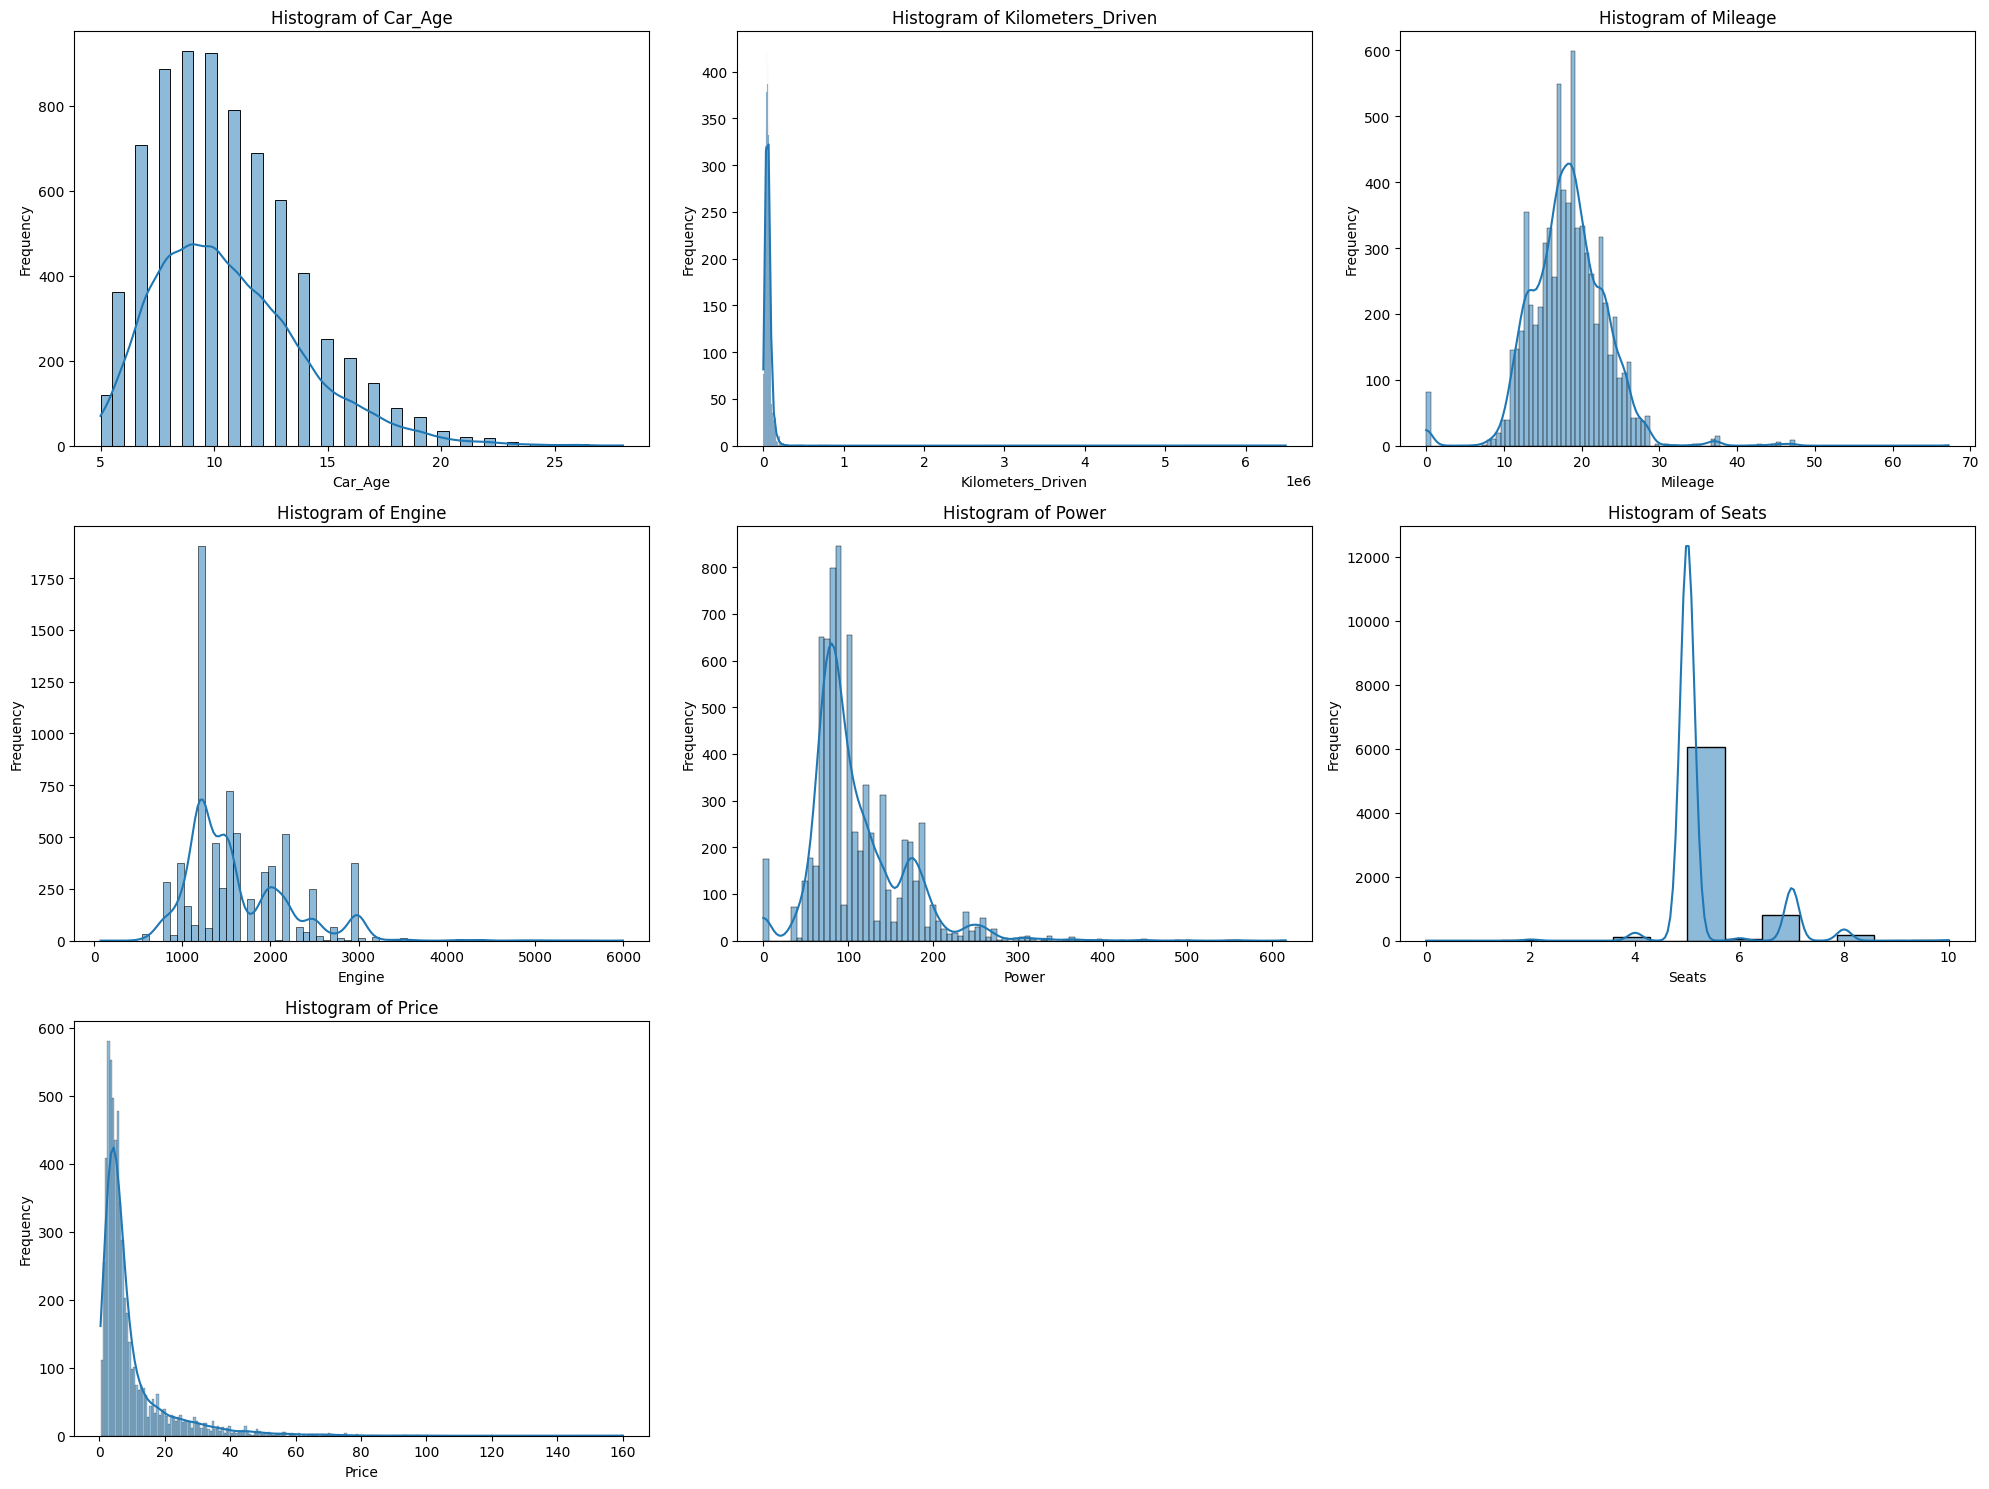

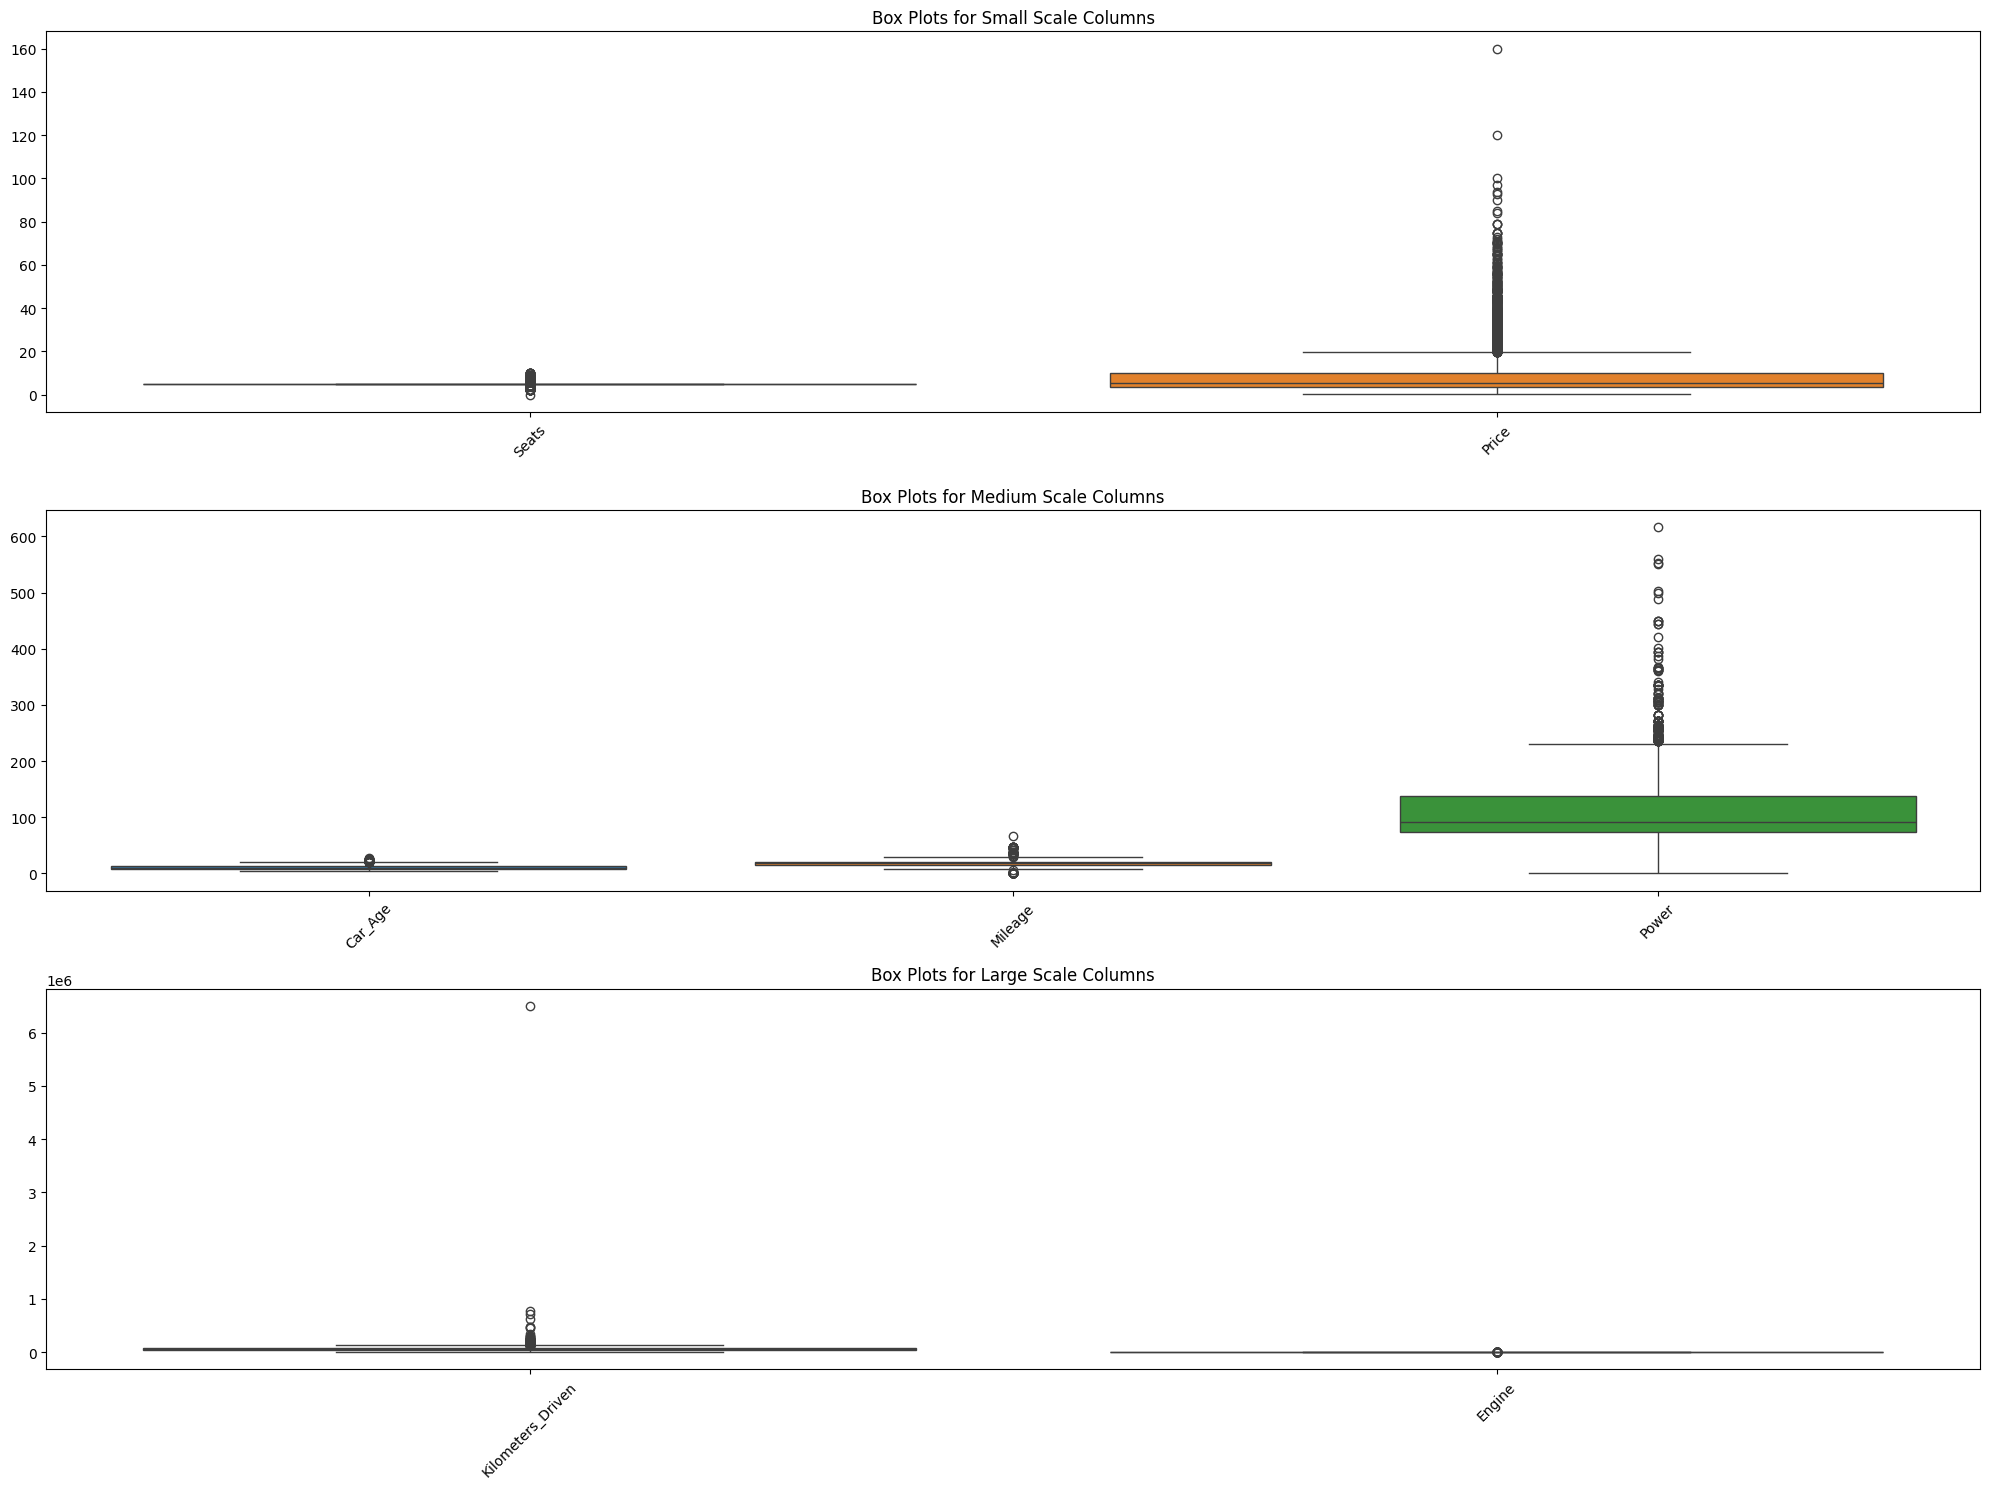

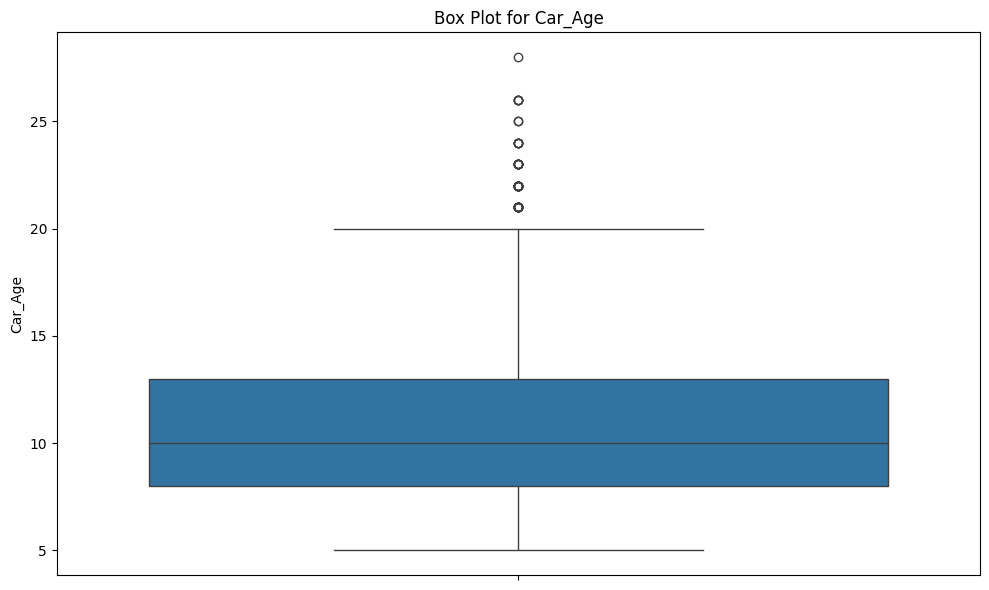

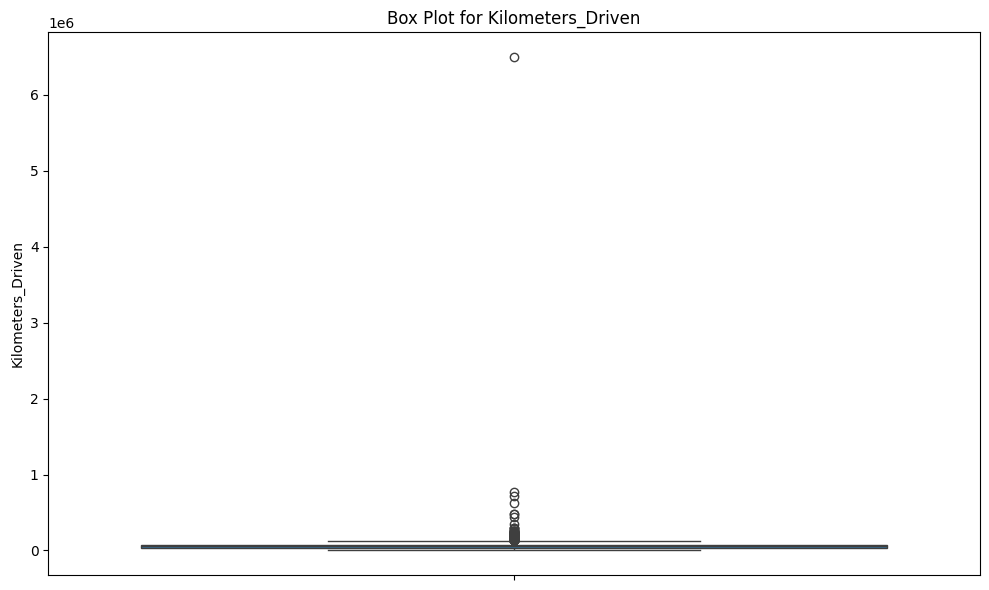

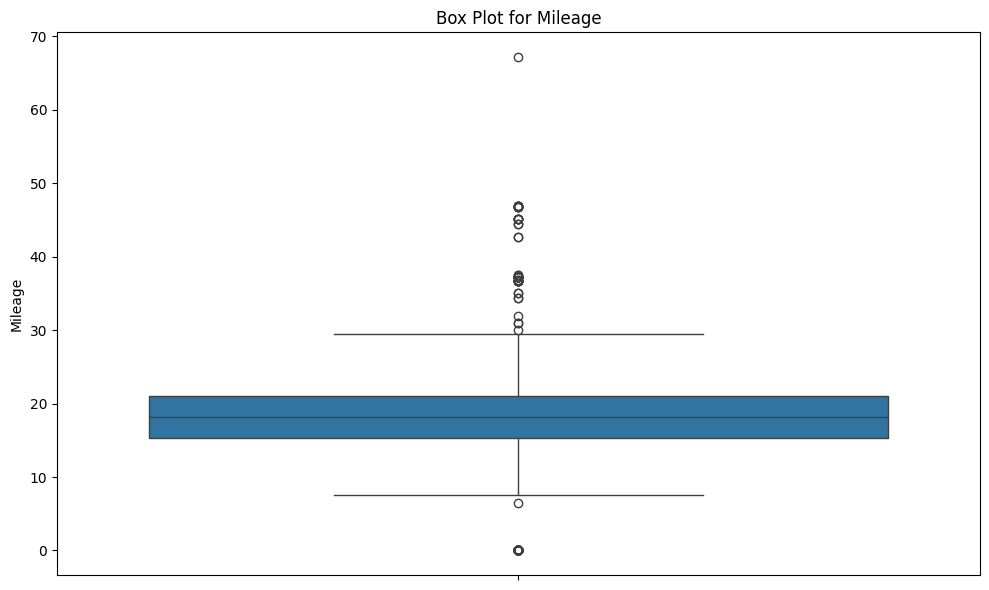

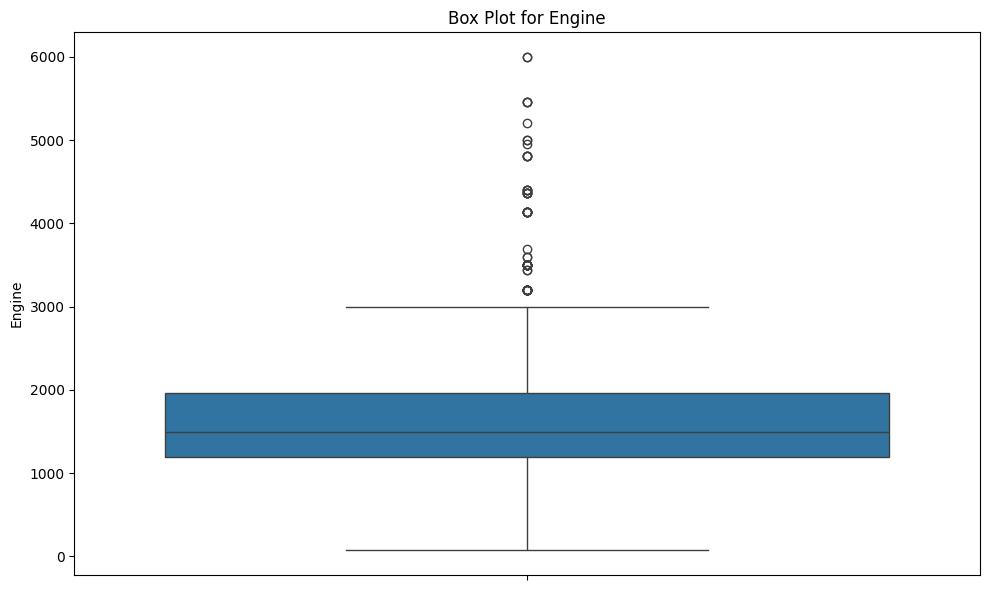

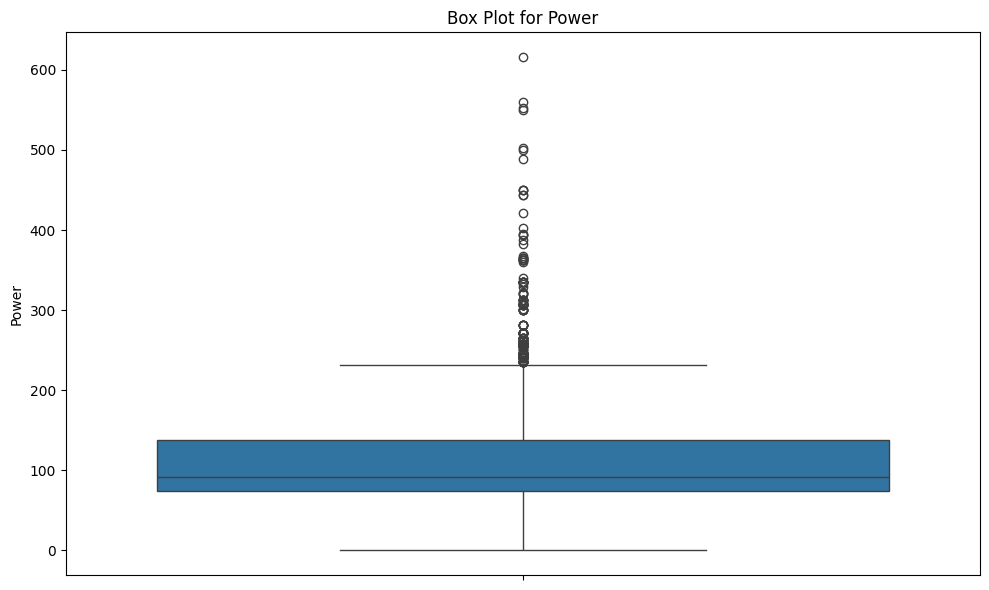

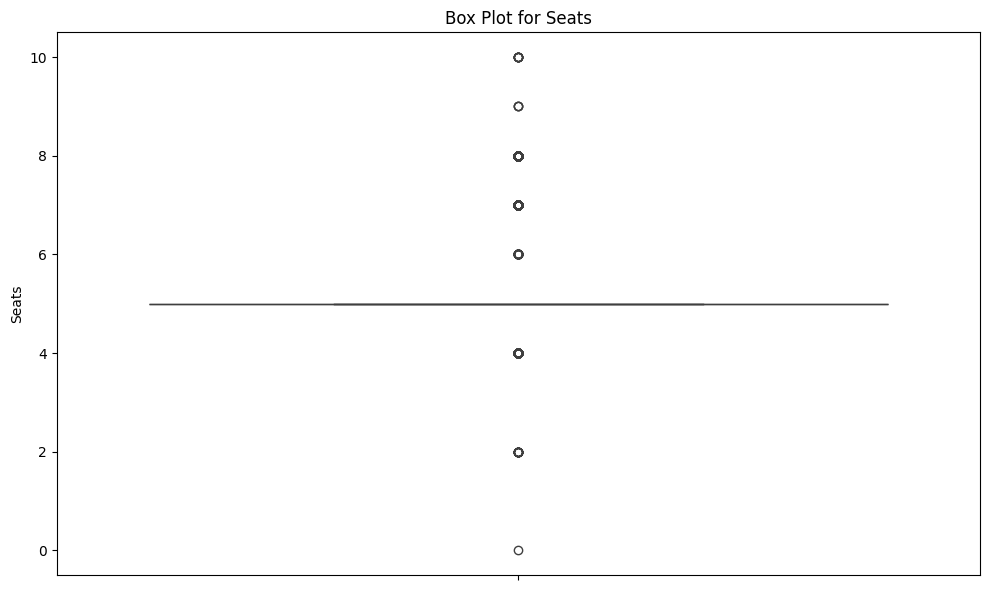

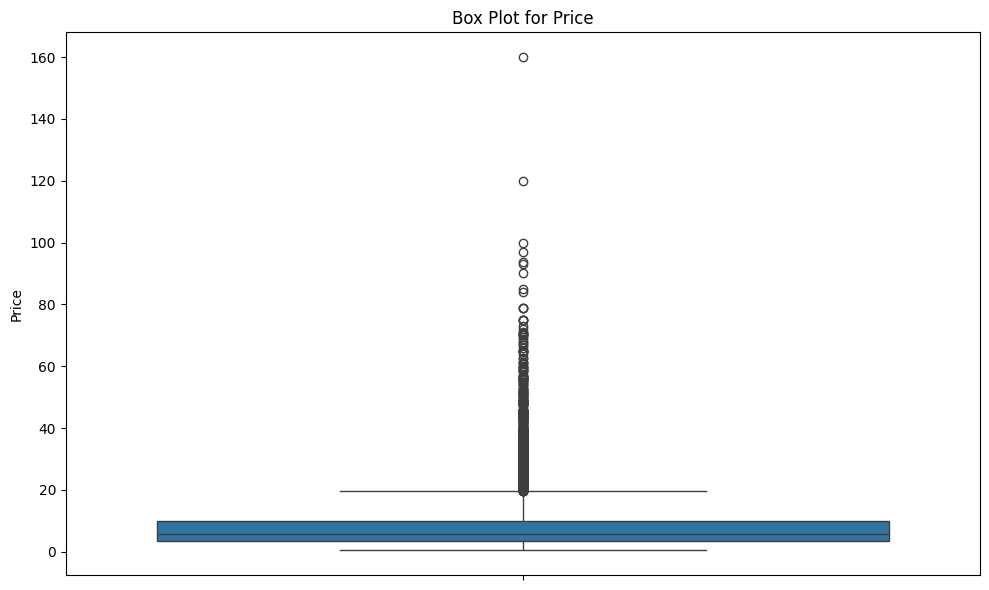

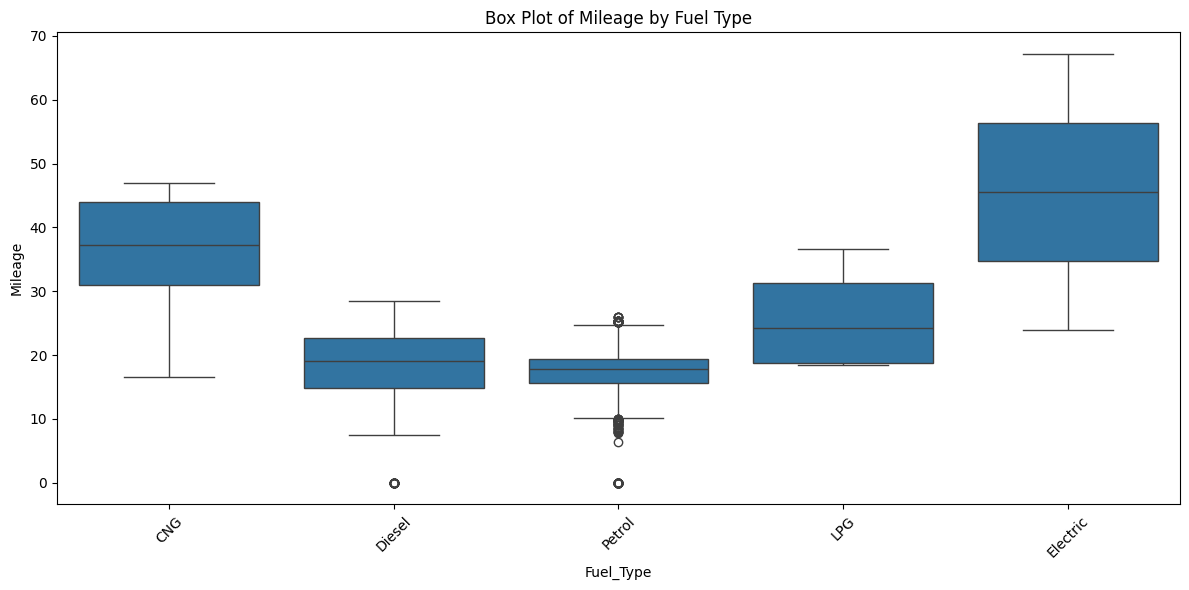

In [81]:
def detect_outliers(data, is_normal):
    if is_normal:
        mean = np.mean(data)
        std = np.std(data)
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
    else:
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def get_scale(column):
    median = column.median()
    if median < 10:
        return 'small'
    elif median < 1000:
        return 'medium'
    else:
        return 'large'

outliers_info = {}
scale_groups = {'small': [], 'medium': [], 'large': []}

numerical_columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Outlier detection and printing results
for col in numerical_columns:
    data = pd.to_numeric(df_cars[col], errors='coerce').dropna()

    _, p_value = stats.normaltest(data)
    is_normal = p_value > 0.05

    outliers, lower_bound, upper_bound = detect_outliers(data, is_normal)

    outliers_info[col] = {
        'is_normal': is_normal,
        'outliers_count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    scale = get_scale(data)
    scale_groups[scale].append(col)

    print(f"{col}:")
    print(f"Normal distribution: {'Yes' if is_normal else 'No'}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print("-------------------------")

# Histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    data = pd.to_numeric(df_cars[col], errors='coerce').dropna()
    sns.histplot(data, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Box plots by scale
plt.figure(figsize=(20, 15))
for i, (scale, columns) in enumerate(scale_groups.items(), 1):
    if columns:
        plt.subplot(3, 1, i)
        sns.boxplot(data=df_cars[columns])
        plt.title(f"Box Plots for {scale.capitalize()} Scale Columns")
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Individual box plots
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_cars[col])
    plt.title(f"Box Plot for {col}")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', data=df_cars)
plt.title("Box Plot of Mileage by Fuel Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Number of non-null values:
Car_Age              7253
Kilometers_Driven    7253
Mileage              7253
Engine               7207
Power                7253
Seats                7200
Price                6019
dtype: int64

Number of non-null values after outlier removal:
Car_Age              7195
Kilometers_Driven    6995
Mileage              7119
Engine               7142
Power                6980
Seats                6047
Price                5301
dtype: int64
Correlation between Car_Age and Kilometers_Driven: 0.3580
Correlation between Car_Age and Mileage: -0.2473
Correlation between Car_Age and Engine: 0.0354
Correlation between Car_Age and Power: -0.0549
Correlation between Car_Age and Seats: 0.0214
Correlation between Car_Age and Price: -0.1304
Correlation between Kilometers_Driven and Mileage: -0.0915
Correlation between Kilometers_Driven and Engine: 0.1094
Correlation between Kilometers_Driven and Power: 0.0360
Correlation between Kilometers_Driven and Seats: -0.0489
Correlatio

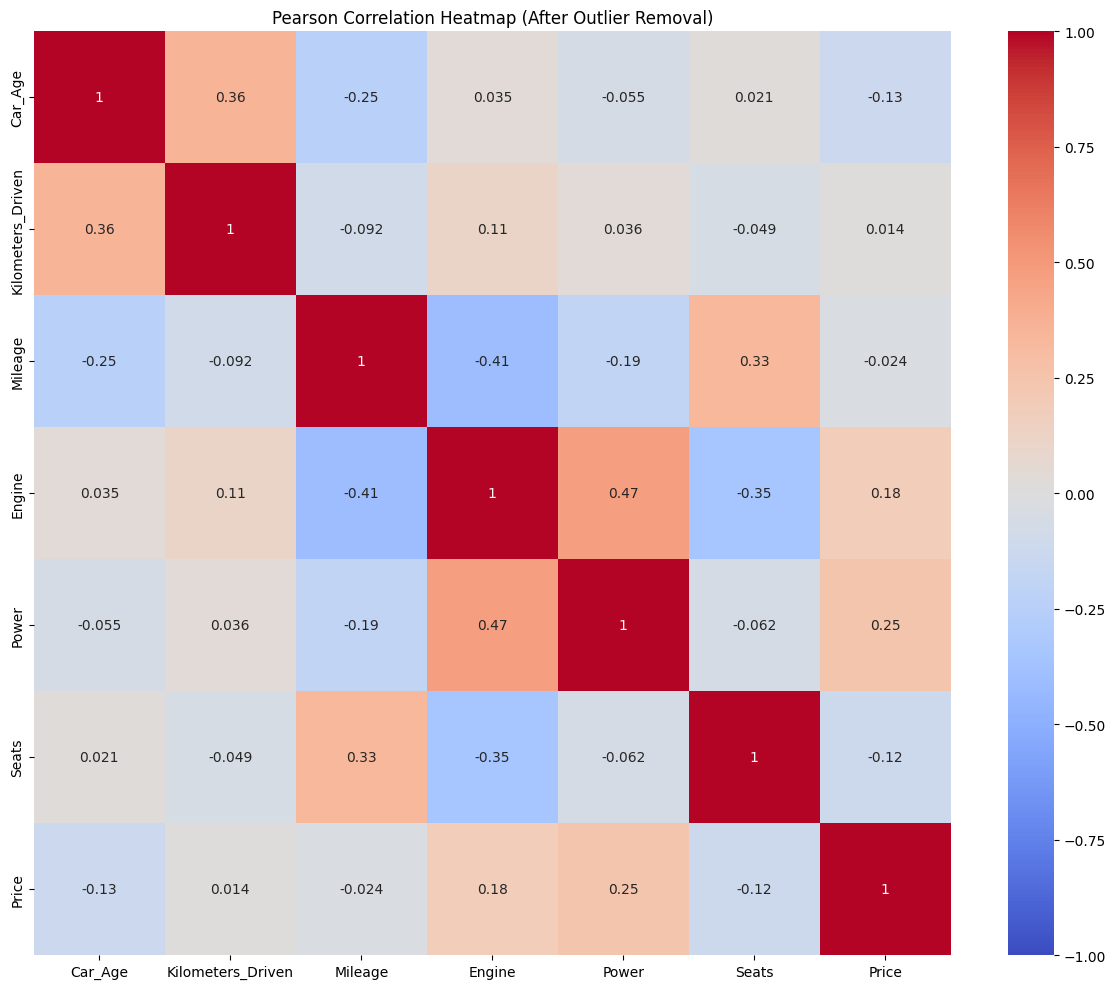

In [82]:
def remove_outliers(dataframe, columns):
    df = dataframe.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = np.nan
    return df

columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

df_cars_clean = remove_outliers(df_cars, columns)

print("Number of non-null values:")
print(df_cars[columns].notna().sum())
print("\nNumber of non-null values after outlier removal:")
print(df_cars_clean[columns].notna().sum())

def pearson_correlation(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x ** 2)
    sum_y_squared = np.sum(y ** 2)
    sum_xy = np.sum(x * y)

    numerator = sum_xy - (sum_x * sum_y / n)
    denominator = np.sqrt((sum_x_squared - sum_x ** 2 / n) * (sum_y_squared - sum_y ** 2 / n))

    if denominator == 0:
        return 0
    else:
        return numerator / denominator


correlations = {}
for i, col1 in enumerate(columns):
    for col2 in columns[i+1:]:
        corr = pearson_correlation(df_cars_clean[col1], df_cars_clean[col2])
        correlations[(col1, col2)] = corr

for (col1, col2), corr in correlations.items():
    print(f"Correlation between {col1} and {col2}: {corr:.4f}")

corr_matrix = np.ones((len(columns), len(columns)))
for (col1, col2), corr in correlations.items():
    i, j = columns.index(col1), columns.index(col2)
    corr_matrix[i, j] = corr_matrix[j, i] = corr


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            xticklabels=columns, yticklabels=columns)
plt.title('Pearson Correlation Heatmap (After Outlier Removal)')
plt.tight_layout()
plt.show()

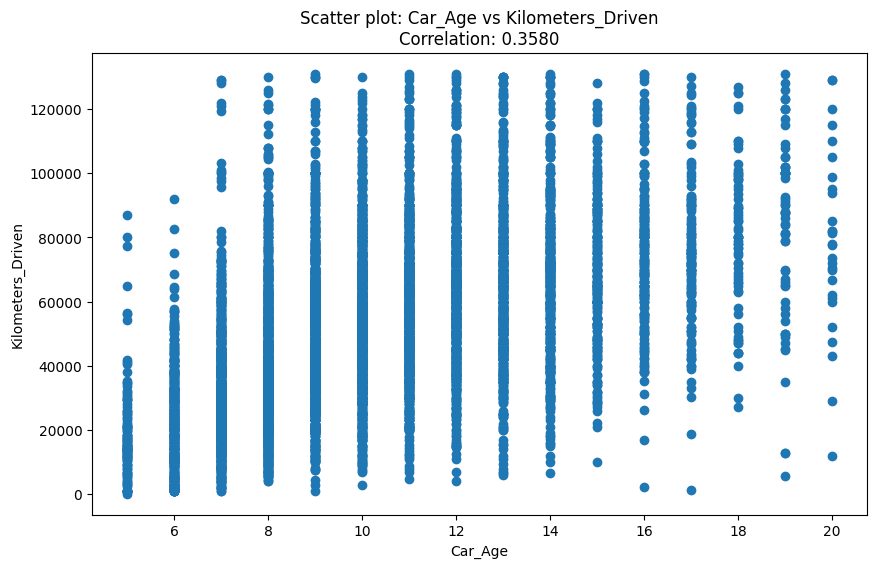

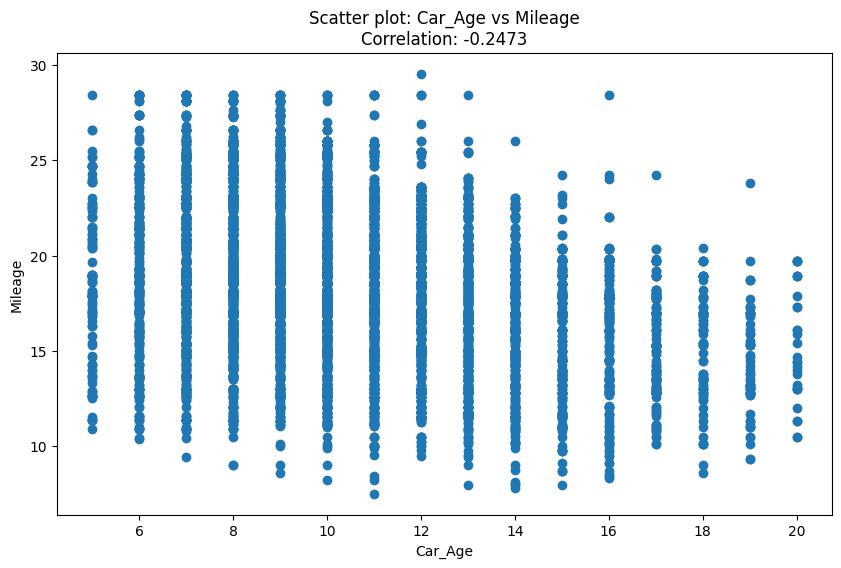

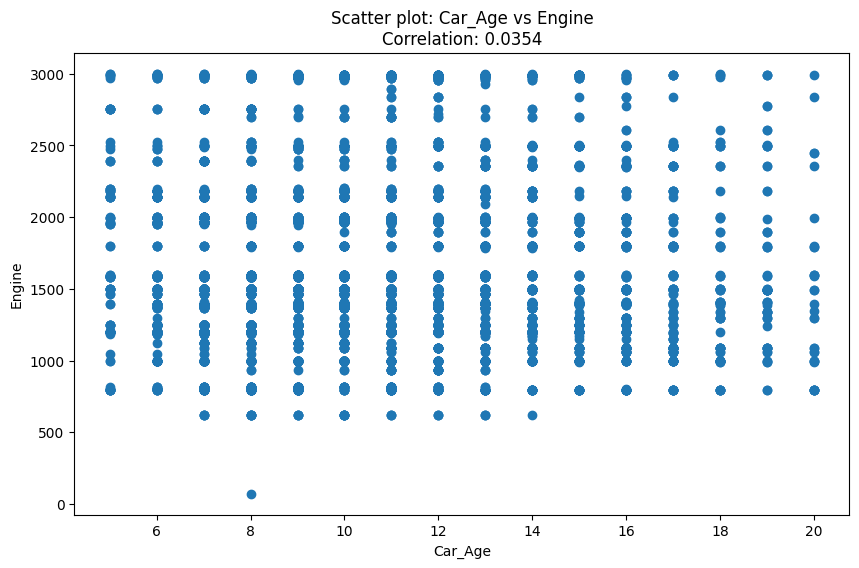

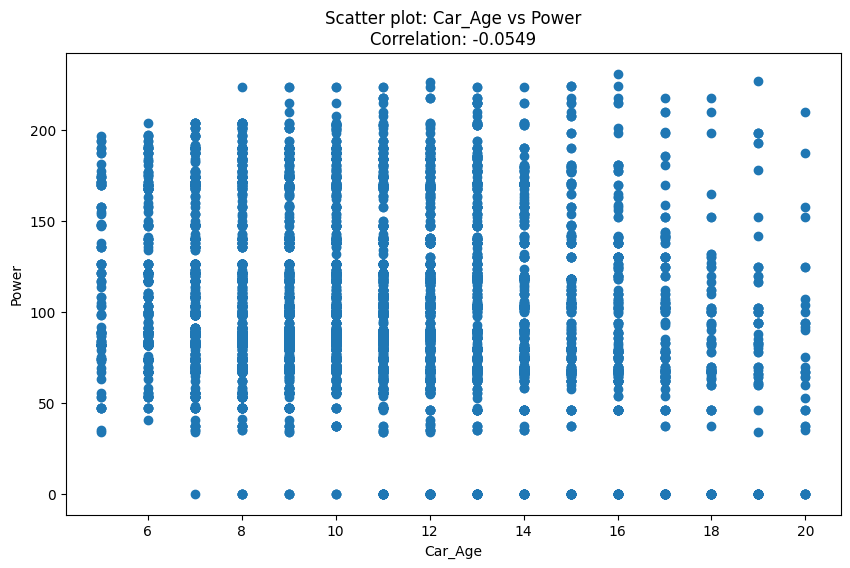

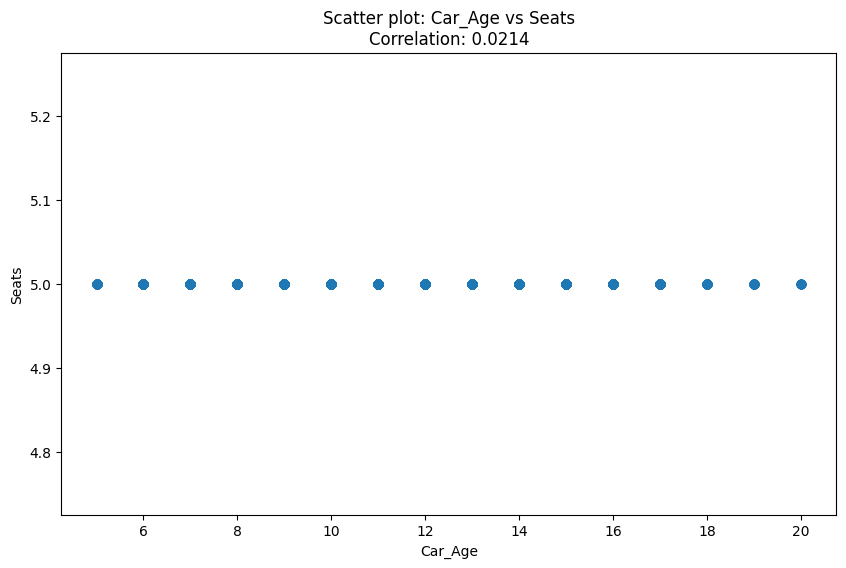

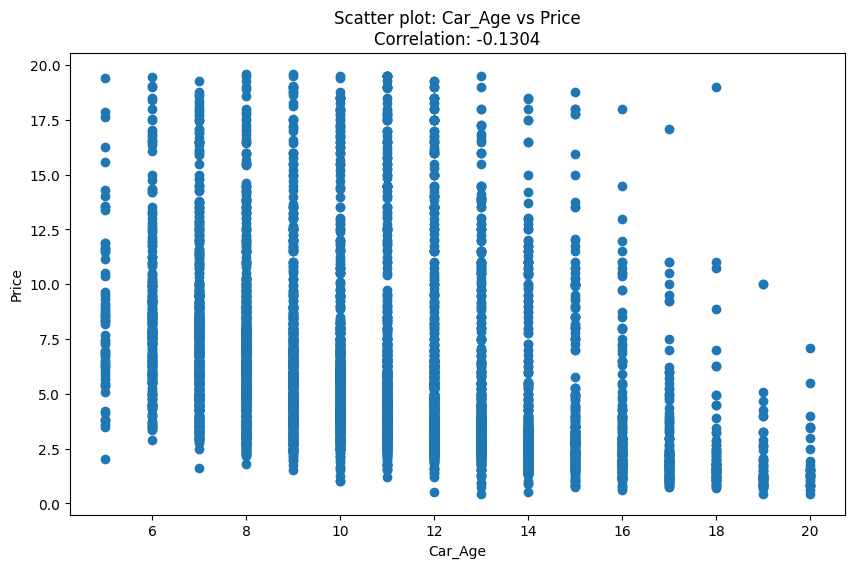

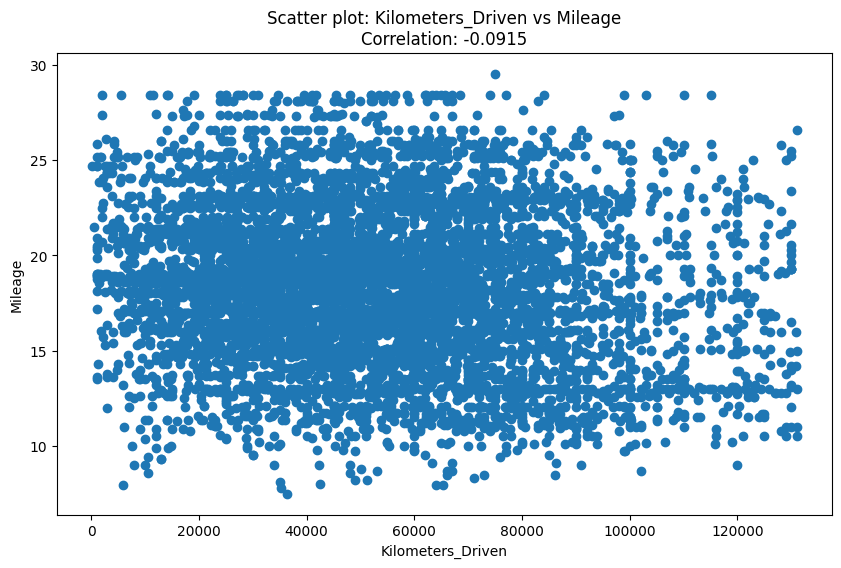

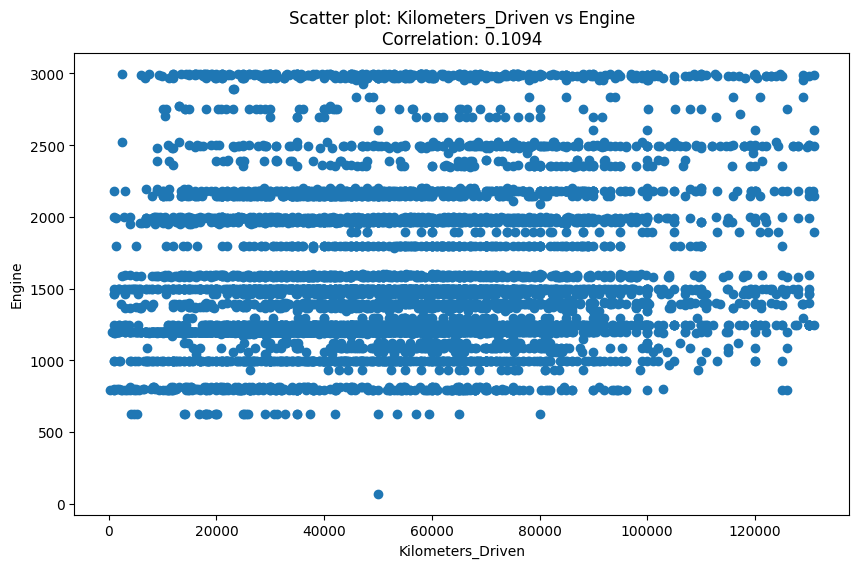

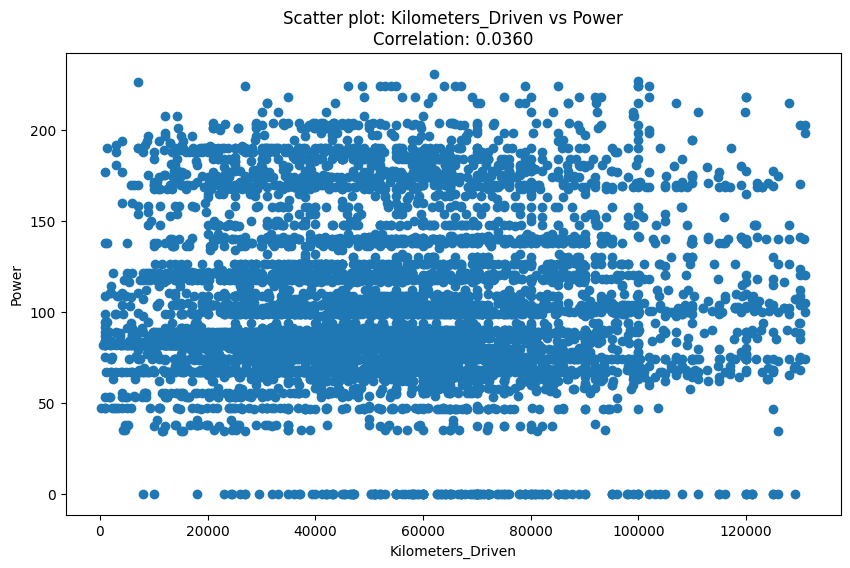

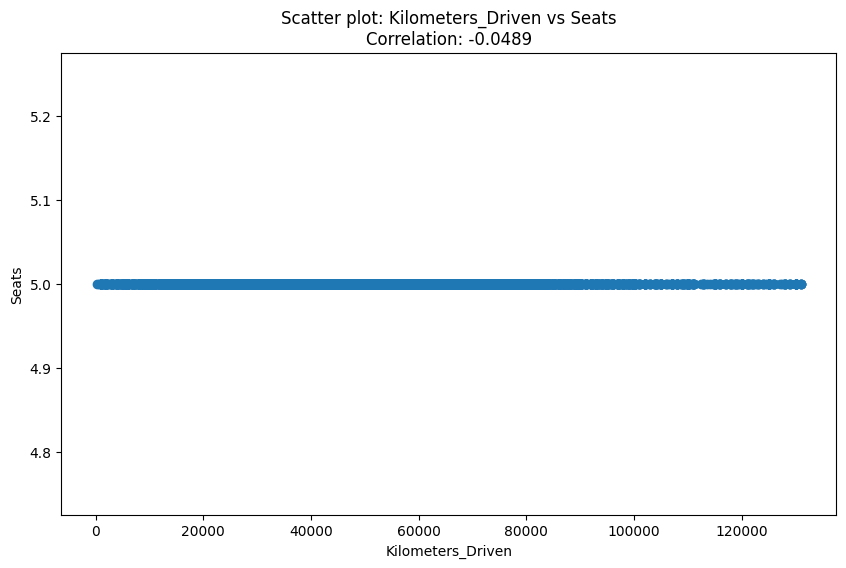

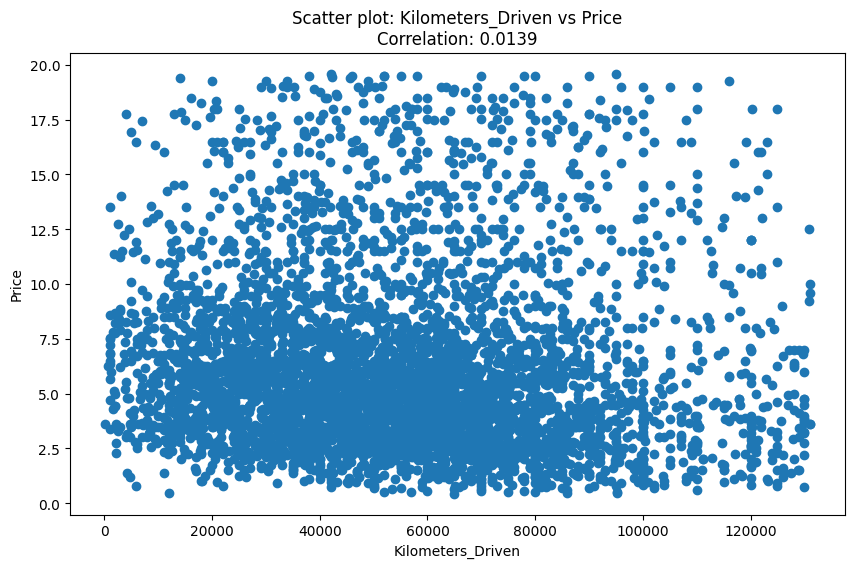

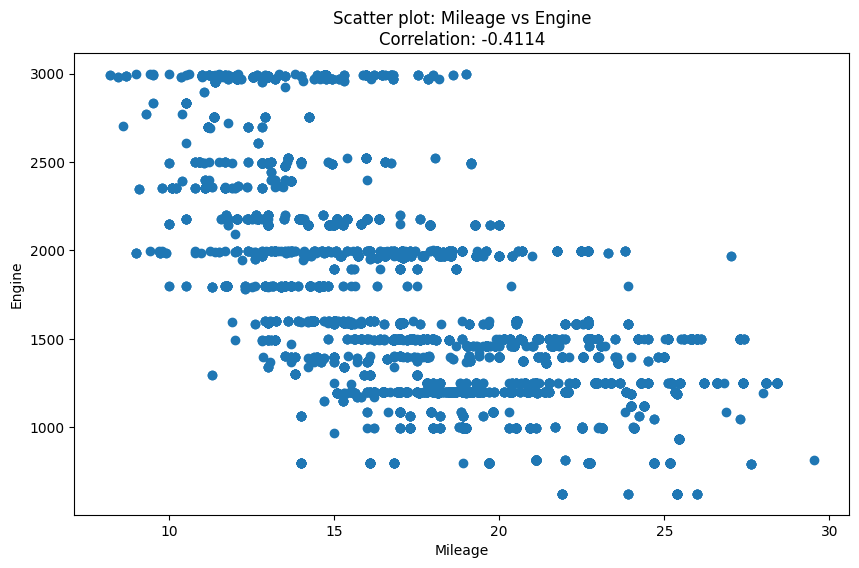

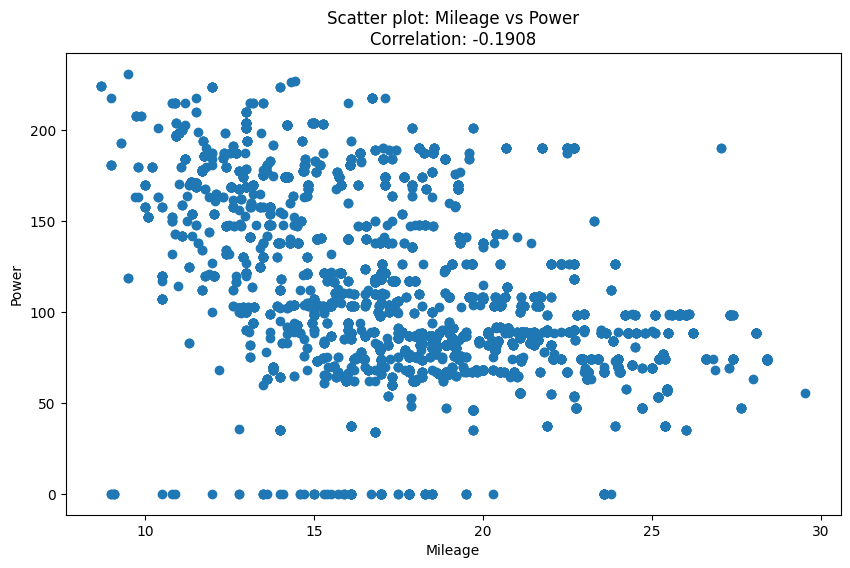

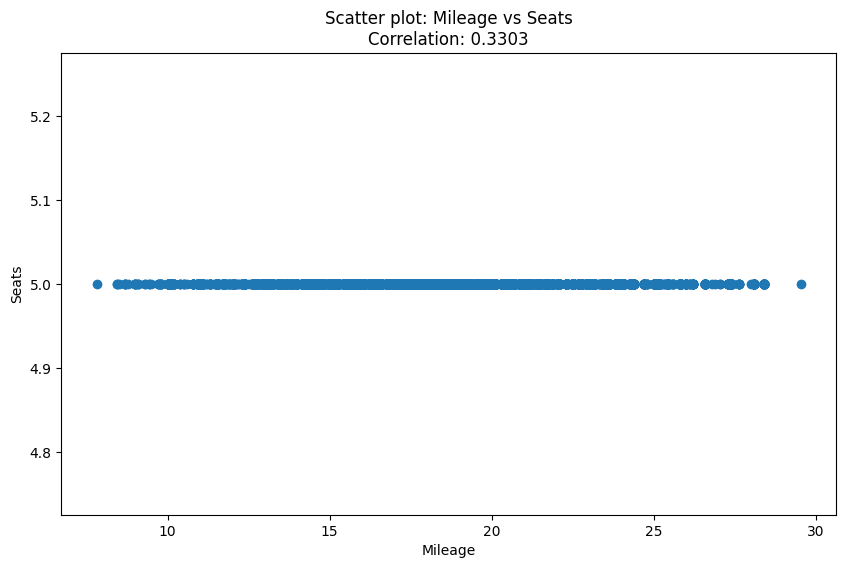

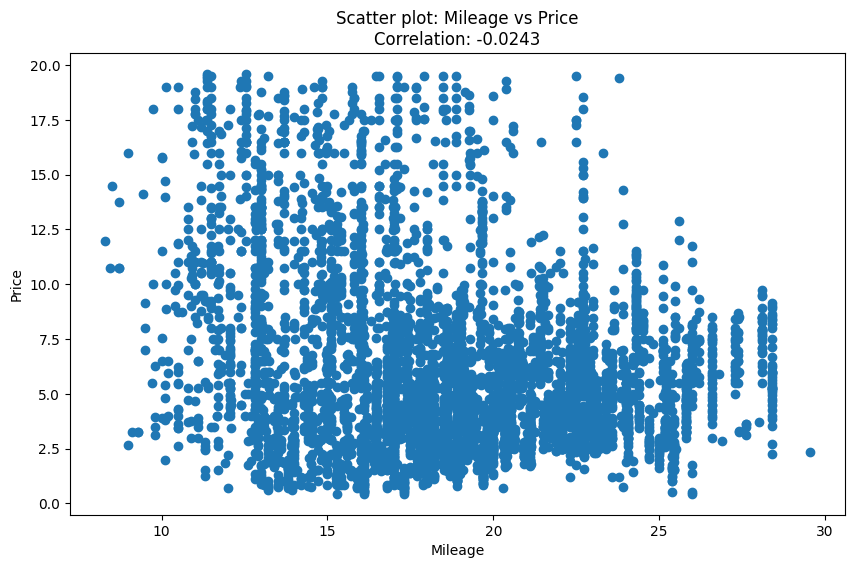

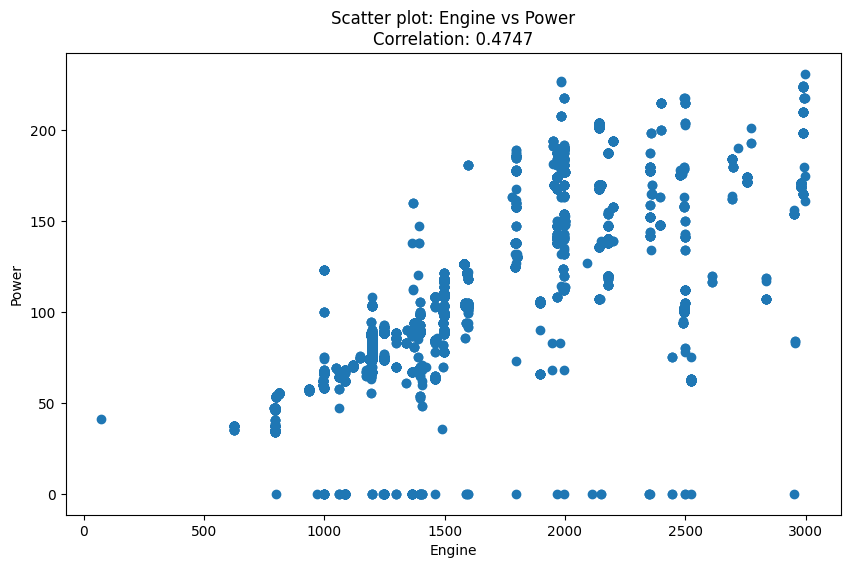

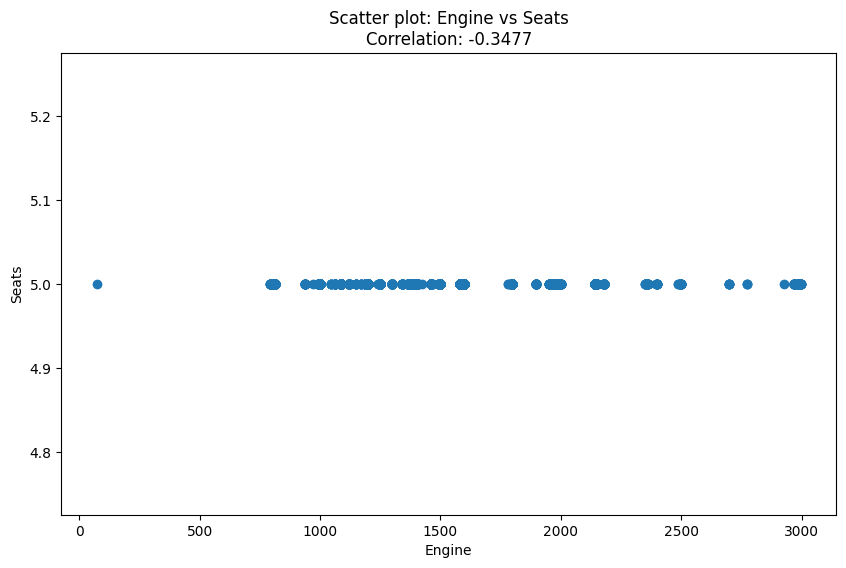

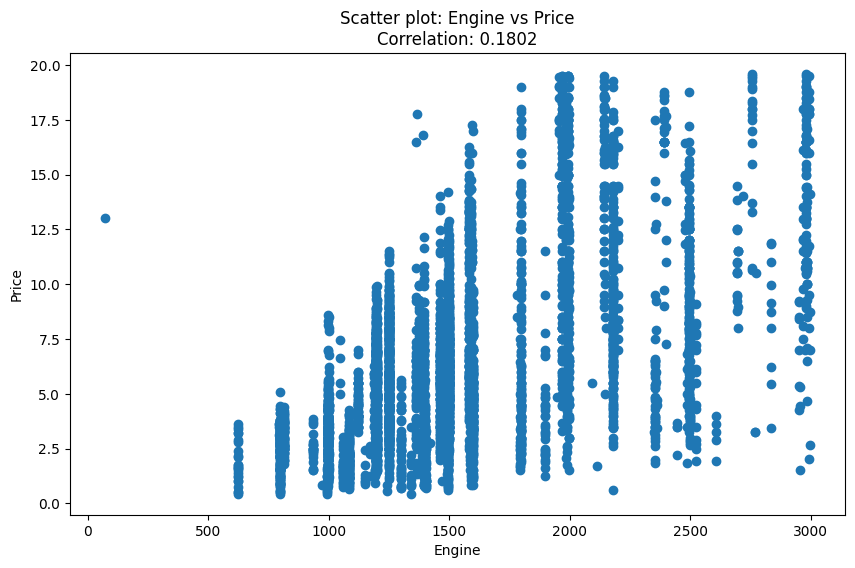

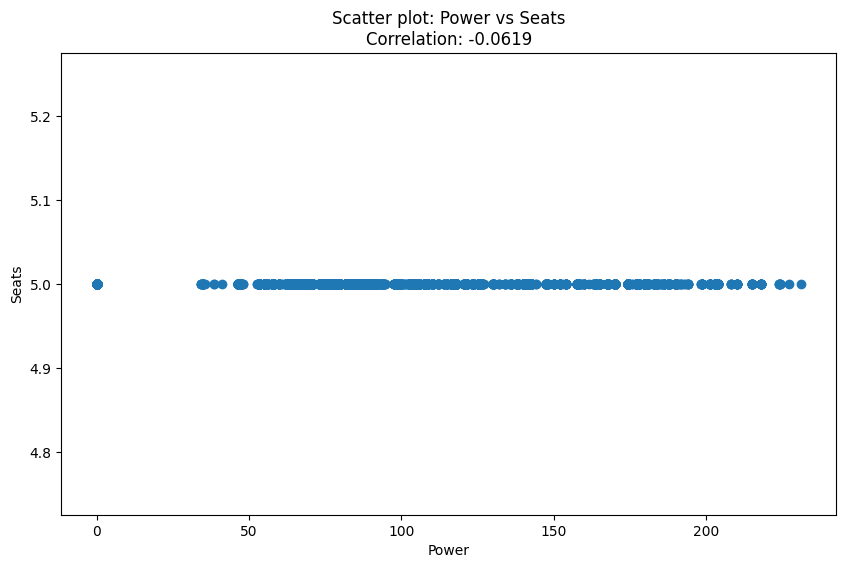

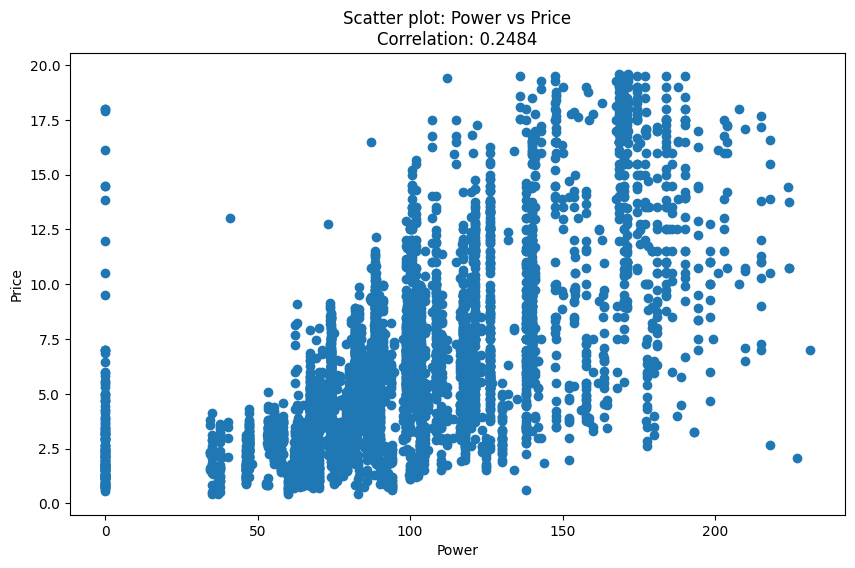

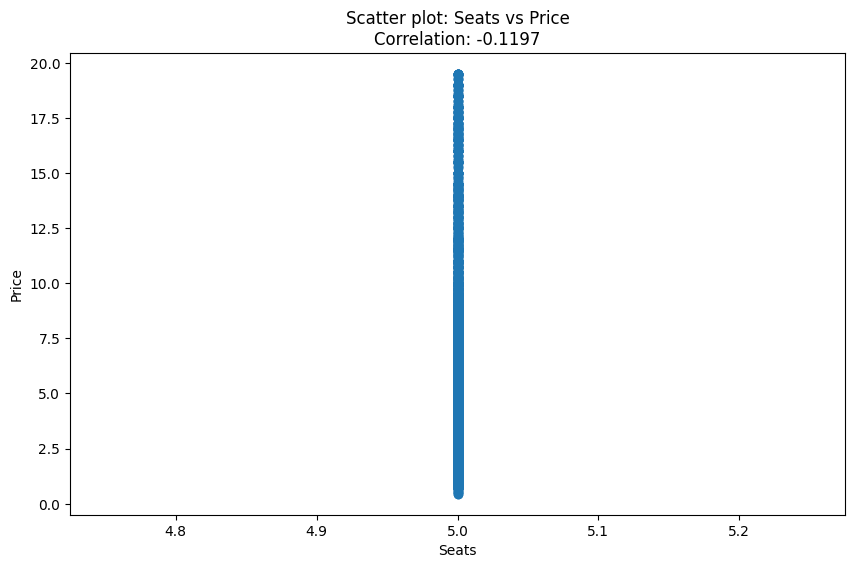

In [83]:
for (col1, col2), corr in correlations.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(df_cars_clean[col1], df_cars_clean[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"Scatter plot: {col1} vs {col2}\nCorrelation: {corr:.4f}")
    plt.show()

In [84]:
df_cars = df_cars.drop('Mileage_Unit', axis=1)

df_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9.0
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13.0
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11.0


In [85]:
missing_columns = ['Engine', 'Power', 'Seats']

print("Missing values for Engine, Power, and Seats:")
print(df_cars_clean[missing_columns].isnull().sum())

Missing values for Engine, Power, and Seats:
Engine     112
Power      274
Seats     1207
dtype: int64


In [86]:
df_cars['Brand'] = df_cars['Name'].str.split(' ').str.get(0)
df_cars['Model'] = df_cars['Name'].str.split(' ').str.get(1)


impute_cols = ['Engine', 'Power', 'Seats']


df_cars_imputed = df_cars.copy()


def outliers_as_missing(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean.loc[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound), col] = np.nan
    return df_clean


df_cars_clean = outliers_as_missing(df_cars_clean, impute_cols)

def impute_missing_values(dataframe, groupby_cols, impute_cols):
    dataframe = dataframe.copy()
    for col in impute_cols:
        dataframe[col] = dataframe.groupby(groupby_cols)[col].transform(lambda x: x.fillna(x.mean()))

    for col in impute_cols:
        dataframe[col].fillna(dataframe[col].mean(), inplace=True)

    return dataframe


df_cars_imputed = impute_missing_values(df_cars_imputed, ['Brand', 'Model'], impute_cols)


print("Missing values for Engine, Power, and Seats after imputation:")
print(df_cars_imputed[missing_columns].isnull().sum())


df_cars_imputed.head()

Missing values for Engine, Power, and Seats after imputation:
Engine    0
Power     0
Seats     0
dtype: int64


/var/folders/8y/qyq16t6549scb0wwphs6rhjm0000gn/T/ipykernel_58104/2064056673.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[col].fillna(dataframe[col].mean(), inplace=True)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,14.0,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9.0,Hyundai,Creta
2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13.0,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12.0,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11.0,Audi,A4


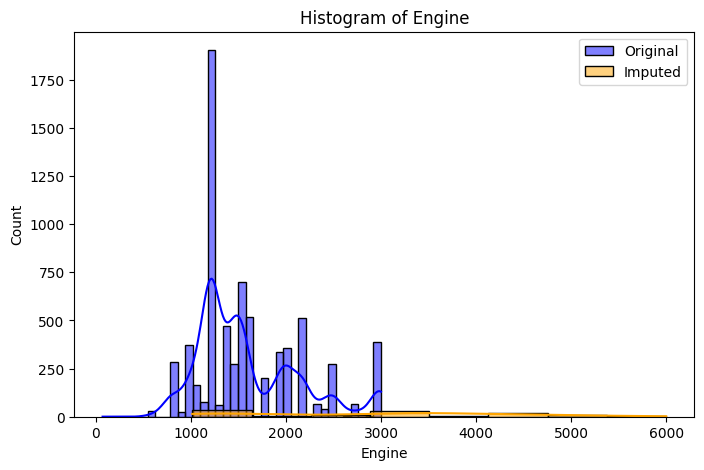

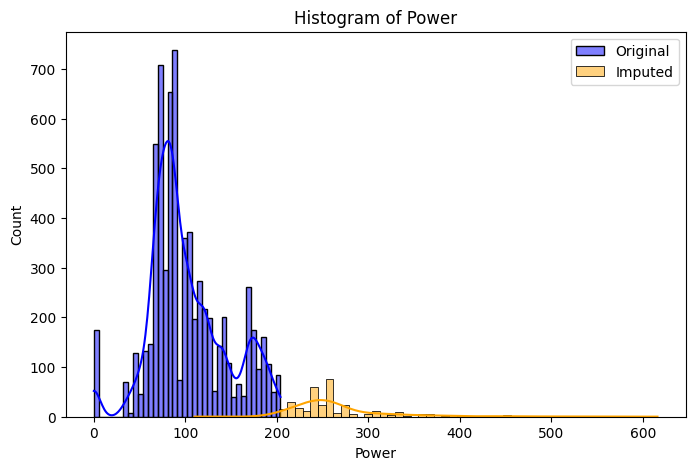

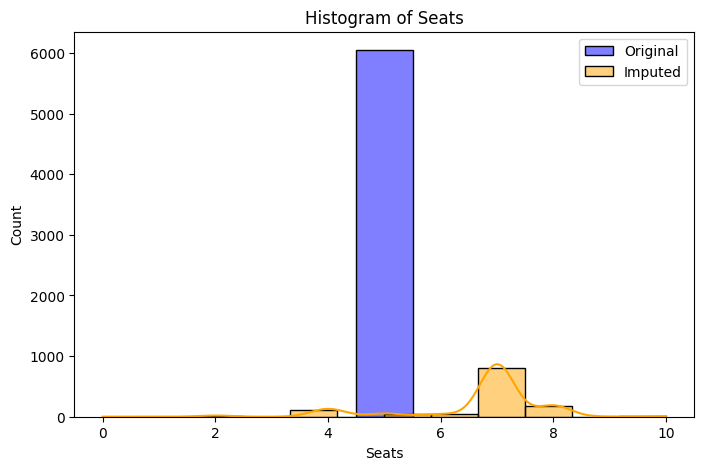

In [87]:
imputed_mask = df_cars_clean[['Engine', 'Power', 'Seats']].isnull()


def plot_histogram_with_imputed(dataframe, columns, imputed_mask):
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(dataframe[~imputed_mask][col], label='Original', color='blue', kde=True)
        sns.histplot(dataframe[imputed_mask][col], label='Imputed', color='orange', kde=True)
        plt.title(f'Histogram of {col}')
        plt.legend()
        plt.show()


plot_histogram_with_imputed(df_cars_imputed, ['Engine', 'Power', 'Seats'], imputed_mask)

In [88]:
df_cars_clean['Seats'] = df_cars_clean['Seats'].fillna(df_cars_clean['Seats'].mode()[0])

df_cars_clean['Engine'] = df_cars_clean['Engine'].fillna(df_cars_clean.groupby('Name')['Engine'].transform('mean'))
df_cars_clean['Power'] = df_cars_clean['Power'].fillna(df_cars_clean.groupby('Name')['Power'].transform('mean'))

print("Missing values for Engine, Power, and Seats after imputation:")
print(df_cars_clean[missing_columns].isnull().sum())


Missing values for Engine, Power, and Seats after imputation:
Engine    106
Power     336
Seats       0
dtype: int64


In [89]:

missing_columns = ['Mileage', 'Price']

print("Missing values for Mileage and Price:")
print(df_cars_clean[missing_columns].isnull().sum())


Missing values for Mileage and Price:
Mileage     135
Price      1953
dtype: int64


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

def impute_missing_values(df, target_column, feature_columns):
    df_missing = df[df[target_column].isnull()]
    df_not_missing = df[df[target_column].notnull()]

    X = df_not_missing[feature_columns].values
    y = df_not_missing[target_column].values

    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    model = LinearRegression()
    model.fit(X, y)

    X_missing = df_missing[feature_columns].values
    X_missing = imputer.transform(X_missing)
    y_missing = model.predict(X_missing)

    df.loc[df[target_column].isnull(), target_column] = y_missing

    return df

df_cars_clean = impute_missing_values(df_cars_clean, 'Price', ['Car_Age', 'Engine', 'Power'])
df_cars_clean = impute_missing_values(df_cars_clean, 'Mileage', ['Car_Age', 'Engine', 'Power'])


print("Missing values for Mileage and Price after imputation:")
print(df_cars_clean[missing_columns].isnull().sum())

Missing values for Mileage and Price after imputation:
Mileage    0
Price      0
dtype: int64
